In [34]:
# import neccessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# read from GitHub so anyone an run it without having to worry about where the data is
data = pd.read_csv('https://github.com/hussenmi/sales1/raw/master/salaries-by-region.csv')
data.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
2,Cal Poly San Luis Obispo,California,"$57,200.00","$101,000.00","$55,000.00","$74,700.00","$133,000.00","$178,000.00"
3,University of California at Los Angeles (UCLA),California,"$52,600.00","$101,000.00","$51,300.00","$72,500.00","$139,000.00","$193,000.00"
4,"University of California, San Diego (UCSD)",California,"$51,100.00","$101,000.00","$51,700.00","$75,400.00","$131,000.00","$177,000.00"


In [35]:
# clean the data by removing '$' and changing the data type from str to int. THIS FIVE LINES OF CODE SHOULD ONlY BE RUN ONCE

data['Starting Median Salary'] = data['Starting Median Salary'].str[1:-4]
a = []
for i in data['Starting Median Salary']:
    a.append(int(i.replace(',','')))
data['Starting Median Salary'] = np.array(a)

data.describe()

,Starting Median Salary
count,273.000000
mean,46365.201465
std,6311.007952
min,34800.000000
25%,42200.000000
50%,45300.000000
75%,48900.000000
max,72200.000000


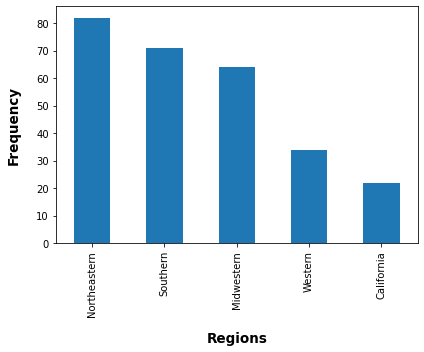

In [36]:
plt.figure(figsize=(6,5))
data['Region'].value_counts().plot(kind='bar')
plt.ylabel('Frequency', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Regions', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('cs1.jpg',dpi=300)
plt.show()

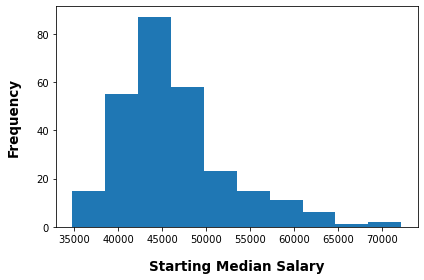

In [37]:
plt.hist(data['Starting Median Salary'])
plt.ylabel('Frequency', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Starting Median Salary', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('cs2.jpg',dpi=300)
plt.show()

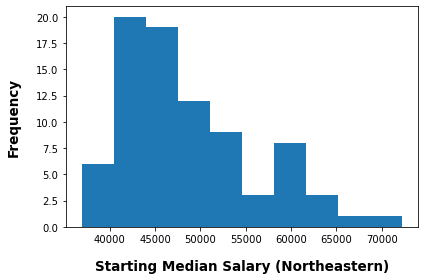

Mean = 48679.26829268293
STD = 7541.322178420395
Median = 46700.0


In [38]:
plt.hist(data[data['Region'] == 'Northeastern']['Starting Median Salary'])
plt.ylabel('Frequency', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Starting Median Salary (Northeastern)', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('cs3.jpg',dpi=300)
plt.show()

print(f"Mean = {np.mean(data[data['Region'] == 'Northeastern']['Starting Median Salary'])}")
print(f"STD = {np.std(data[data['Region'] == 'Northeastern']['Starting Median Salary'],ddof=1)}") #apply Bessel's correction
print(f"Median = {np.median(data[data['Region'] == 'Northeastern']['Starting Median Salary'])}")

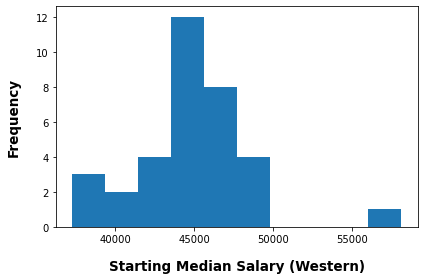

Mean = 44932.35294117647
STD = 3784.4755121364947
Median = 45000.0


In [39]:
plt.hist(data[data['Region'] == 'Western']['Starting Median Salary'])
plt.ylabel('Frequency', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Starting Median Salary (Western)', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('cs4.jpg',dpi=300)
plt.show()

print(f"Mean = {np.mean(data[data['Region'] == 'Western']['Starting Median Salary'])}")
print(f"STD = {np.std(data[data['Region'] == 'Western']['Starting Median Salary'],ddof=1)}") #apply Bessel's correction
print(f"Median = {np.median(data[data['Region'] == 'Western']['Starting Median Salary'])}")

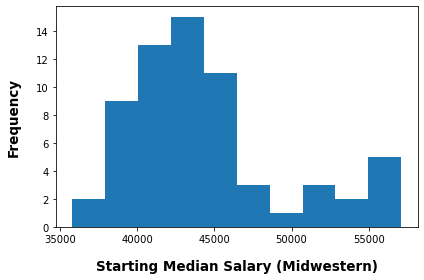

Mean = 44460.9375
STD = 5149.4372380919085
Median = 43200.0


In [40]:
plt.hist(data[data['Region'] == 'Midwestern']['Starting Median Salary'])
plt.ylabel('Frequency', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Starting Median Salary (Midwestern)', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('cs5.jpg',dpi=300)
plt.show()

print(f"Mean = {np.mean(data[data['Region'] == 'Midwestern']['Starting Median Salary'])}")
print(f"STD = {np.std(data[data['Region'] == 'Midwestern']['Starting Median Salary'],ddof=1)}") #apply Bessel's correction
print(f"Median = {np.median(data[data['Region'] == 'Midwestern']['Starting Median Salary'])}")

In [41]:
northeast = data[data['Region'] == 'Northeastern']['Starting Median Salary']
west = data[data['Region'] == 'Western']['Starting Median Salary']
midwest = data[data['Region'] == 'Midwestern']['Starting Median Salary']

In [42]:
# This function can calculate confidence intervals from just one sample or for the difference between two groups. Every 
# variable is set to 0 by default and if the user enters values for a single confidence interval, it will work that way, 
# and if the user enters values for the confidence interval between means,it will work that way too. The function can accept
# confidence interval in percent or the t-critical value because it can calculate one from the other.

def ci_mean(x=0,n=0,ssd=0,x1=0,n1=0,ssd1=0,x2=0,n2=0,ssd2=0,ci='not_specified',tcrt='not_specified'):
    if x == 0:  # x=0 means the user wants confidence interval for difference of means
        if ci != 'not_specified':
            df = (n1-1)+(n2-1)
            tcrt = stats.t.ppf(ci+(1-ci)/2,df)
        else:
            df = (n1-1)+(n2-1)
            ci = round(1-(1-stats.t.cdf(tcrt,df))*2,2)

        se = (ssd1**2/n1 + ssd2**2/n2)**0.5  # standard error for difference bewteen two means
        me = round(tcrt*se,3)
        low = round(x1-x2,3)-me
        up = round(x1-x2,3)+me
        interval = (low,up)

        print(f"{ci*100}% confidence interval: {round(x1-x2,3)} ± {me} = {interval}")
    else:  # if the user wants confidence interval from a single sample
        if ci != 'not_specified':
            tcrt = stats.t.ppf(ci+(1-ci)/2,n-1)
        else:
            ci = round(1-(1-stats.t.cdf(tcrt,n-1))*2,2)

        se = ssd/(n)**0.5  # standard error from a single sample
        me = round(tcrt*se,3)
        low = x-me
        up = x+me
        interval = (low, up)

        print(f"{ci*100}% confidence interval: {x} ± {me} = {interval}")
        
        
xne,xwe,xmid=np.mean(northeast),np.mean(west),np.mean(midwest) # calculate the mean for the three regions
sne,swe,smid=np.std(northeast,ddof=1),np.std(west,ddof=1),np.std(midwest,ddof=1) # calculate the std for the three regions
nne,nwe,nmid=len(northeast),len(west),len(midwest) # figure of the sample size for the three regions
        
        
ci_mean(x=xne,ssd=sne,n=nne,ci=0.95) # confidence interval for the mean of starting median salary in Northeastern region
ci_mean(x=xwe,ssd=swe,n=nwe,ci=0.95) # confidence interval for the mean of starting median salary in Western region
ci_mean(x=xmid,ssd=smid,n=nmid,ci=0.95) # confidence interval for the mean of starting median salary in Midwestern region

95.0% confidence interval: 48679.26829268293 ± 1657.01 = (47022.25829268293, 50336.27829268293)
95.0% confidence interval: 44932.35294117647 ± 1320.466 = (43611.88694117647, 46252.81894117647)
95.0% confidence interval: 44460.9375 ± 1286.291 = (43174.6465, 45747.2285)


In [43]:
# the function being called is the same for the ones that calculate the confidence interval from a single sample; here, it
# just takes more arguments. Here, the function is being called using the values created above.

ci_mean(x1=xne,ssd1=sne,n1=nne,x2=xmid,ssd2=smid,n2=nmid,ci=0.95) # confidence interval for d/ce b/n northeast & midwest
ci_mean(x1=xne,ssd1=sne,n1=nne,x2=xwe,ssd2=swe,n2=nwe,ci=0.95) # confidence interval for d/ce b/n northeast & west

95.0% confidence interval: 4218.331 ± 2080.46 = (2137.871, 6298.791)
95.0% confidence interval: 3746.915 ± 2091.611 = (1655.304, 5838.526)


In [44]:
# This function can do a hyothesis test on a single mean and on difference of means. If the first four parameters are given,
# the user wants a hypothesis test on a single mean; if they provide, thwo differnet samples as a list, they want hypothesis
# test on difference of means. By default, significance value is 0.05, but one can change it as needed. Tails is also 1 by 
# default, but one can change it as needed. In this case, tails = 1 for the first test and it becomes 2 for the secong test.
# The significnce level also changes from 0.05 to 0.025 because we applied the Bonferroni correction to avoid p-hacking. The
# function works by calculating the impt values from the samples and then calculating the standard error,t-value and p-value
# and finally comapres it with the significance level. If the result is statistically significant, it also calculates for 
# practical significance using Cohen's d and Hedge's g. It also tells us whether or not we should reject our null hypothesis

def significance_mean(x=0,n=0,s=0,pmean=0,sample1=0,sample2=0,sig_value=0.05,tails=1):
    if x == 0:  # if the user chooses hypothesis test for difference of means
        n1 = len(sample1)
        n2 = len(sample2)
        x1 = np.mean(sample1)
        x2 = np.mean(sample2)
        s1 = np.std(sample1,ddof=1) # apply Bessel's correction
        s2 = np.std(sample2,ddof=1)
        se = (s1**2/n1 + s2**2/n2)**0.5  # standard error for difference of means
        tval = (x1-x2)/se
        df = min(n1,n2) - 1  # conservative df value
        p_value = stats.t.cdf(tval,df)
    else:  # if the user chooses hypothesis test on a single mean
        tval = (x-pmean)/(s/(n)**0.5)
        p_value = stats.t.cdf(tval,n-1)
        
    print('t =', round(tval,3))
    if p_value < 0.5:  # correct p-value since stats.t.cdf gives us cumulative values
        print('p-value =', round(p_value,4))
    else:
        p_value = 1-p_value
        print('p-value =', round(p_value,4))
        
    
    if tails == 2:  # for 2 tail
        p_value = p_value*2
        if p_value < sig_value:
            print(f"Reject hypothesis!")
            spop = (((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))**0.5  # denominator for Cohen's d
            d = (x1-x2)/spop
            g = d * (1-(3/(4*(n1+n2)-9)))  # calculating Hedge's g
            print(f"Effect size: Cohen's d = {round(d,3)}")
            print(f"Effect size: Hedge's g = {round(g,3)}")
        else:
            print(f"Fail to reject hypothesis!") 
    else:  # for 1 tail
        if p_value < sig_value:
            print(f"Reject hypothesis!")
            spop = (((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))**0.5 # denominator for Cohen's d
            d = (x1-x2)/spop
            g = d * (1-(3/(4*(n1+n2)-9)))  # calculating Hedge's g
            print(f"Effect size: d = {round(d,3)}")
            print(f"Effect size: Hedge's g = {round(g,3)}")
        else:
            print(f"Fail to reject hypothesis!") 

            
            
    if p_value < 0.5:  # print the p-value after it's been adjusted for number of tails
        print('p-value =', round(p_value,4))
    else:
        print('p-value =', round(p_value,4))
            

# calling the function for difference of means test. The samples are Northeastern and Midwestern. 
# The Bonferroni correction is also applied
significance_mean(sample1=northeast,sample2=midwest,sig_value=0.05/2)

t = 4.008
p-value = 0.0001
Reject hypothesis!
Effect size: d = 0.639
Effect size: Hedge's g = 0.636
p-value = 0.0001


In [45]:
# calling the function for difference of means test. The samples are Northeastern and Western. 
# The Bonferroni correction is applied and the test is also two-tailed.
significance_mean(sample1=northeast,sample2=west,tails=2,sig_value=0.05/2)

t = 3.549
p-value = 0.0006
Reject hypothesis!
Effect size: Cohen's d = 0.561
Effect size: Hedge's g = 0.558
p-value = 0.0012
